In [1]:
#%% Import packages and functions
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy import signal
from random import randrange
from numpy import shape as s
import mne
import os
import sys

In [2]:
files = ['patient_gr_wuerzburg_29_11_19.edf'] #, 'patient_gr_wuerzburg_30_11_19.edf', 'patient_gr_wuerzburg_12_12_19.edf', 'patient_gr_wuerzburg_13_12_19.edf', 'patient_gr_wuerzburg_17_12_19.edf', 'patient_gr_wuerzburg_18_12_19.edf', 'patient_gr_wuerzburg_21_01_20.edf', 'patient_gr_wuerzburg_22_01_20.edf', 'patient_gr_wuerzburg_29_01_20.edf', 'patient_gr_wuerzburg_30_01_20.edf']

In [88]:
# Load data
os.chdir(r'C:\Users\rhyso\eegdata')
raw = mne.io.read_raw_edf( files[0], preload=True)

# Process data
channels = raw.ch_names
info = raw.info
fs = info['sfreq']
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim

x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]

Extracting EDF parameters from C:\Users\rhyso\eegdata\patient_gr_wuerzburg_29_11_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9365999  =      0.000 ... 37463.996 secs...


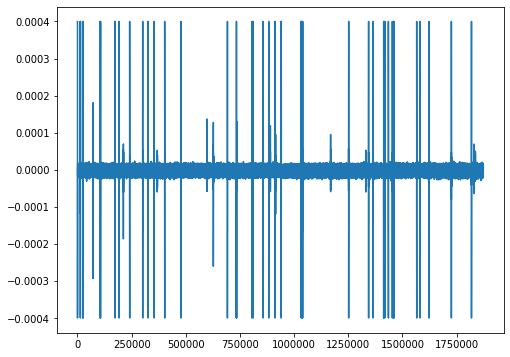

In [89]:
plt.plot(x[0]) #plot the pleth signal for the whole session
plt.rcParams["figure.figsize"]= [16,6]
plt.show()

Next, take slices of the pleth signal to show the variety of signal types ostensibly produced by stimulus trains

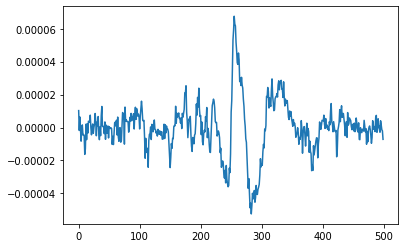

In [38]:
dataslice = x[0]
dataslice = dataslice[625200:625700] #take a specified, single stimulus train example
plt.plot(dataslice)
plt.show()

^ This signal is dubious. Some deflection but does not exhibit clear 5 peaks as expected from the stimulus train so should not be labelled as a stimulus train.

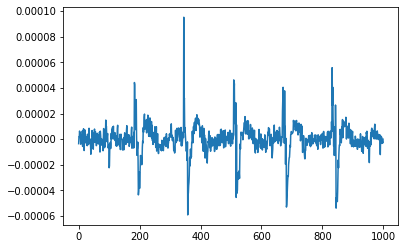

In [48]:
dataslice = x[0]
dataslice = dataslice[1168000:1169000]
plt.plot(dataslice)
plt.show()

In [ ]:
^ This signal is ideal. Five distinct, unsaturated peaks.

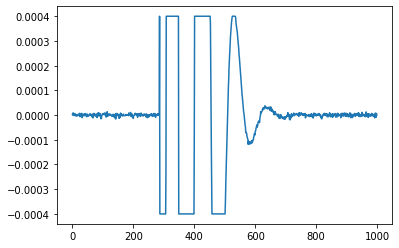

In [41]:
dataslice = x[0]
dataslice = dataslice[240500:241500]
plt.plot(dataslice)
plt.show()

^ This type of signal is certainly caused by the stimulus train but the saturation raises issues with identifying precise timing. There are an estimated 55-100 stimulus trains per session. A quick glance at the data for this session suggests over 30 stimulus trains showed saturation pattern. 

Now, I'll look across other sessions: (It would be simpler to loop through this section but I couldn't get it to work with python yet)

In [72]:
files = ['patient_gr_wuerzburg_29_11_19.edf', 'patient_gr_wuerzburg_30_11_19.edf', 'patient_gr_wuerzburg_12_12_19.edf', 'patient_gr_wuerzburg_13_12_19.edf', 'patient_gr_wuerzburg_17_12_19.edf', 'patient_gr_wuerzburg_18_12_19.edf', 'patient_gr_wuerzburg_21_01_20.edf', 'patient_gr_wuerzburg_22_01_20.edf', 'patient_gr_wuerzburg_29_01_20.edf', 'patient_gr_wuerzburg_30_01_20.edf']

#Session 0
stim0 = x[0]

# Session 1
raw = mne.io.read_raw_edf( files[1], preload=True)   
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim
x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]
x = x[0]
stim1 = x
    
# Session 2
raw = mne.io.read_raw_edf( files[2], preload=True)
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim
x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]
x = x[0]
stim2 = x

# Session 3
raw = mne.io.read_raw_edf( files[3], preload=True)
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim
x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]
x = x[0]
stim3 = x

# Session 4
raw = mne.io.read_raw_edf( files[4], preload=True)
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim
x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]
x = x[0]
stim4 = x

# Session 5
raw = mne.io.read_raw_edf( files[5], preload=True)
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim
x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]
x = x[0]
stim5 = x
    
# Session 6
raw = mne.io.read_raw_edf( files[6], preload=True)
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim
x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]
x = x[0]
stim6 = x

# Session 7
raw = mne.io.read_raw_edf( files[7], preload=True)
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim
x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]
x = x[0]
stim7 = x

# Session 8
raw = mne.io.read_raw_edf( files[8], preload=True)
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim
x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]
x = x[0]
stim8 = x

# Session 9
raw = mne.io.read_raw_edf( files[9], preload=True)
z, t = raw[0:7,:] # EEG
x, t = raw[-2,:] # stim
x_ind = range(0,z.shape[1],5) # match 50hz pleth signal to EEG data (250Hz sample rate)
x = x[:,x_ind]
x = x[0]
stim9 = x
    
    

Extracting EDF parameters from C:\Users\rhyso\eegdata\patient_gr_wuerzburg_30_11_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8478249  =      0.000 ... 33912.996 secs...
Extracting EDF parameters from C:\Users\rhyso\eegdata\patient_gr_wuerzburg_12_12_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8084249  =      0.000 ... 32336.996 secs...
Extracting EDF parameters from C:\Users\rhyso\eegdata\patient_gr_wuerzburg_13_12_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6720749  =      0.000 ... 26882.996 secs...
Extracting EDF parameters from C:\Users\rhyso\eegdata\patient_gr_wuerzburg_17_12_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8602499  =      0.000 ... 34409.996 secs...
Extracting EDF parameters from C:\Users\rhyso\eegdata\patient_gr_wuerzbu

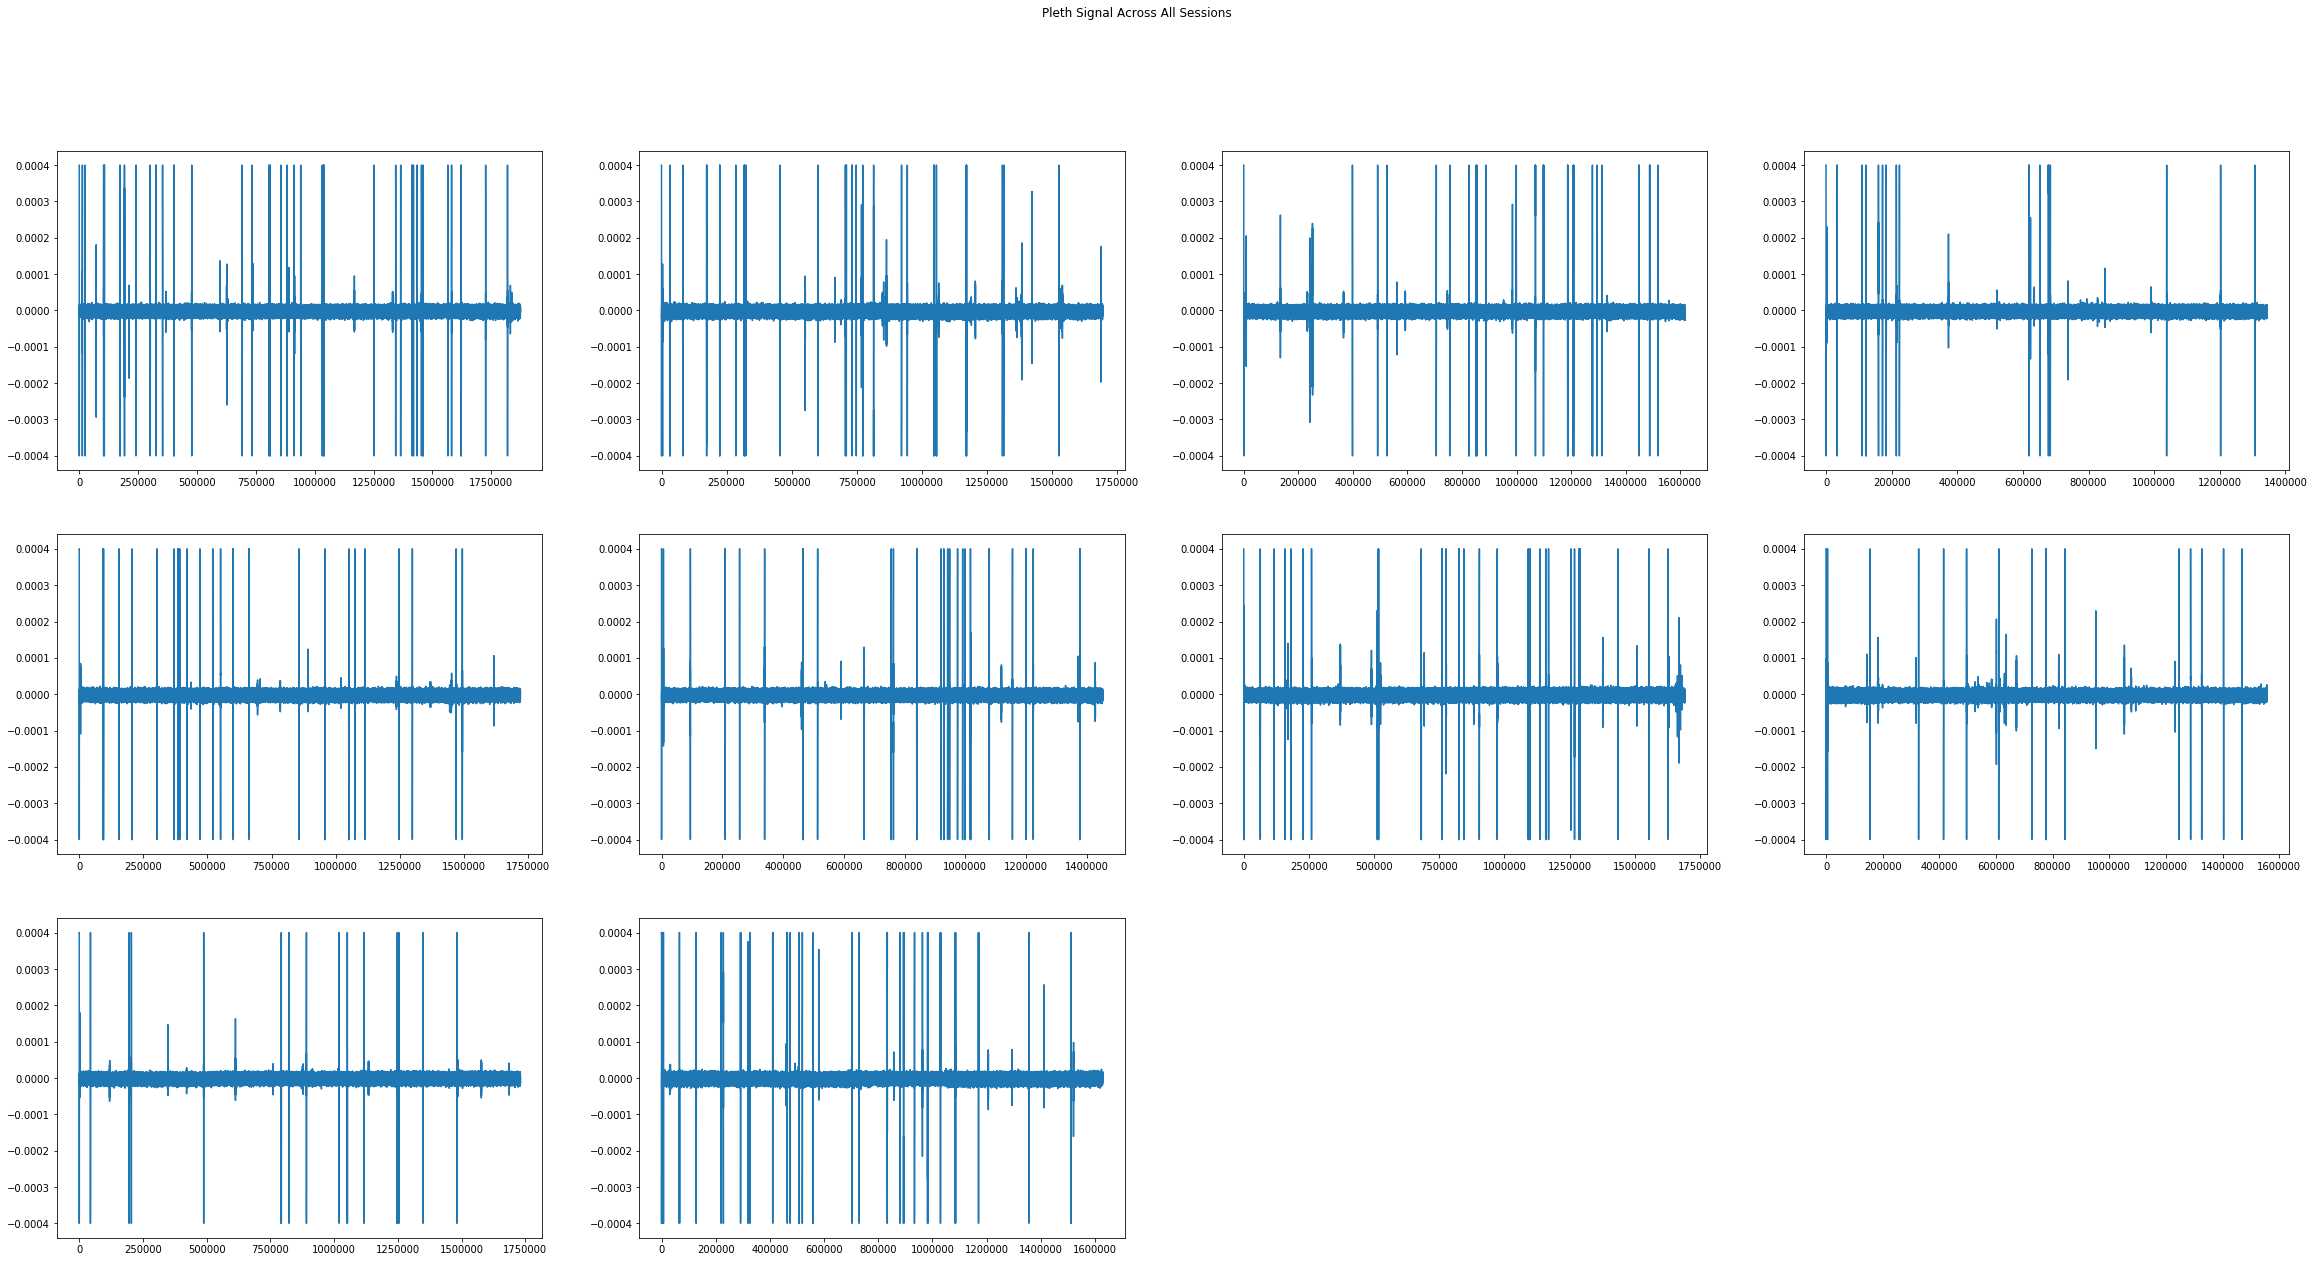

In [79]:
plt.subplot(3,4,1)
plt.plot(stim0)
plt.subplot(3,4,2)
plt.plot(stim1)
plt.subplot(3,4,3)
plt.plot(stim2)
plt.subplot(3,4,4)
plt.plot(stim3)
plt.subplot(3,4,5)
plt.plot(stim4)
plt.subplot(3,4,6)
plt.plot(stim5)
plt.subplot(3,4,7)
plt.plot(stim6)
plt.subplot(3,4,8)
plt.plot(stim7)
plt.subplot(3,4,9)
plt.plot(stim8)
plt.subplot(3,4,10)
plt.plot(stim9)
plt.suptitle('Pleth Signal Across All Sessions')
plt.rcParams["figure.figsize"]= 20,40
plt.show()

^ Visual inspection across all sessions suggests that a high proportion of putative stimulus trains produced a saturated pleth signal